In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Análise Exploratória

### Carregar e visualizar as primeiras linhas dos dados

In [2]:
laptop_price = pd.read_pickle("../../datasets/processed/laptop_price.pkl")
laptop_price.head()

,company,product,typename,inches,screen_resolution,cpu_manufacturer,cpu,gpu_manufacturer,gpu,ram_gb,type_storage,hdd_gb,ssd_gb,hybrid_gb,flash_storage_gb,opsys,weight_kg,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel,Others Intel,Intel,Intel Iris Plus Graphics 640,8,ssd,0,128,0,0,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Others Intel,Intel,Intel HD Graphics 6000,8,flash storage,0,0,0,128,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,1920x1080,Intel,Intel Core i5,Intel,Intel HD Graphics 620,8,ssd,0,256,0,0,Outros,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel,Others Intel,AMD,AMD Radeon Pro 455,16,ssd,0,512,0,0,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel,Others Intel,Intel,Intel Iris Plus Graphics 650,8,ssd,0,256,0,0,macOS,1.37,1803.60


### Verificar quantidade de valores únicos

In [3]:
print("Quantidade de Valores únicos por coluna")
for column in laptop_price.columns:
    print(f"{column}: {len(laptop_price[column].unique())}")

Quantidade de Valores únicos por coluna
company: 19
product: 618
typename: 6
inches: 18
screen_resolution: 15
cpu_manufacturer: 3
cpu: 8
gpu_manufacturer: 4
gpu: 110
ram_gb: 9
type_storage: 9
hdd_gb: 6
ssd_gb: 13
hybrid_gb: 3
flash_storage_gb: 7
opsys: 4
weight_kg: 171
price_euros: 791


### Função para criar gráfico de barra de média de preço

In [4]:
def create_bar(x, x_label, rotation=0):
    df_groupred = laptop_price.groupby(by=x, as_index=False)['price_euros'].mean()

    fig = plt.figure(figsize=(16, 6))
    sns.barplot(x=x, y='price_euros', data=df_groupred)
    plt.xlabel(x_label, fontsize='large', family='monospace')
    plt.ylabel("Preço (€)", fontsize='large',family='monospace')
    plt.xticks(rotation=rotation, size=12)
    plt.yticks(size=12)

    plt.title(f"Média de Preço dos Notebooks por {x_label.capitalize()}", fontsize='large', fontweight='bold', 
            style='italic', family='monospace')
    plt.show() 

### Verificar média de preço por marca

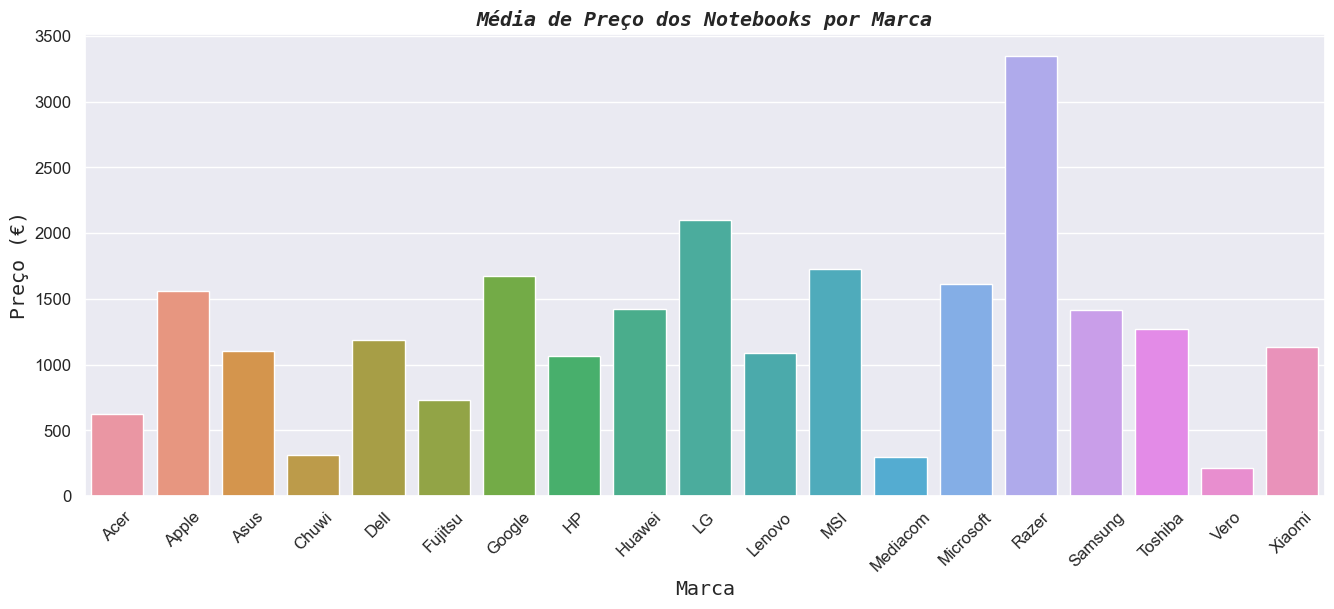

In [5]:
create_bar('company', 'Marca', 45)

### Verificar média de preço por tipo

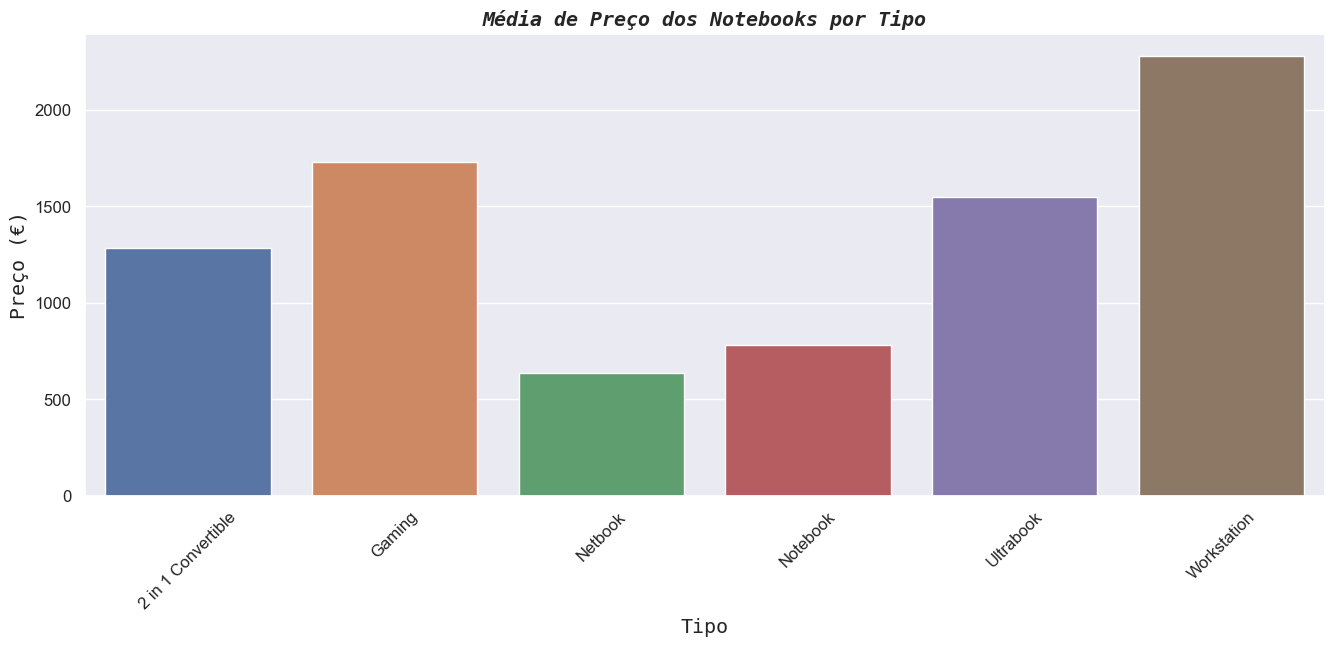

In [6]:
create_bar('typename', 'Tipo', 45)

### Verificar média de preço por cpu

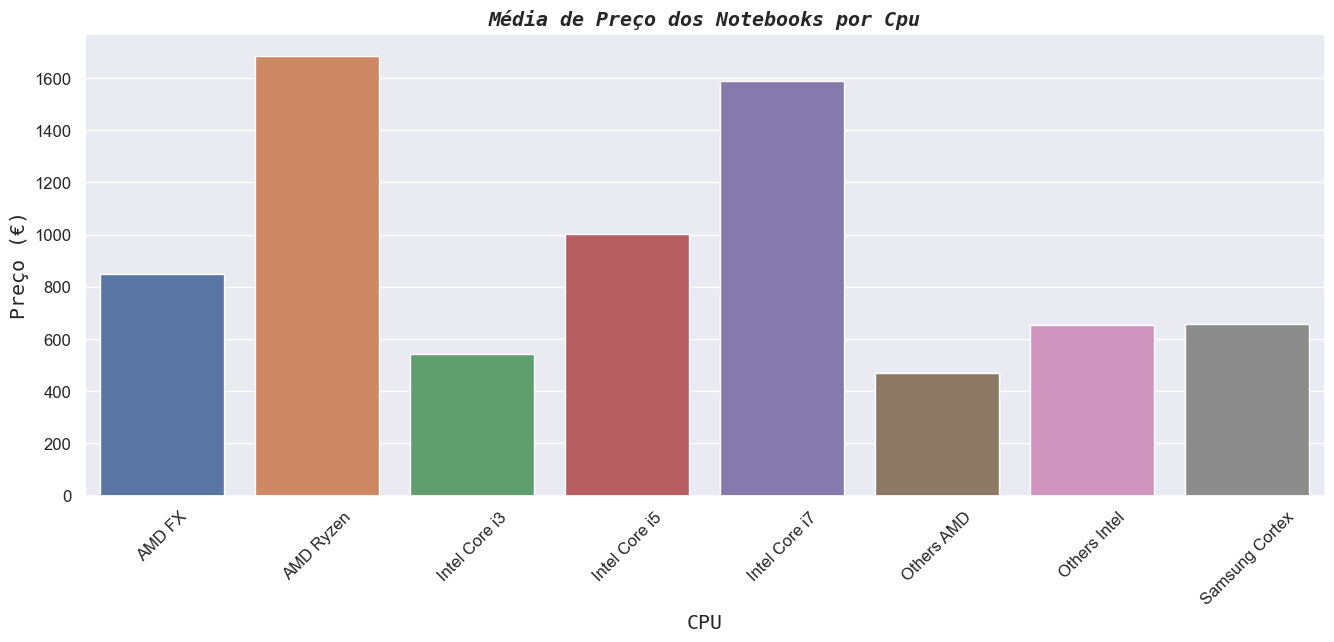

In [7]:
create_bar('cpu', 'CPU', 45)

### Verificar média de preço por quantidade de ram

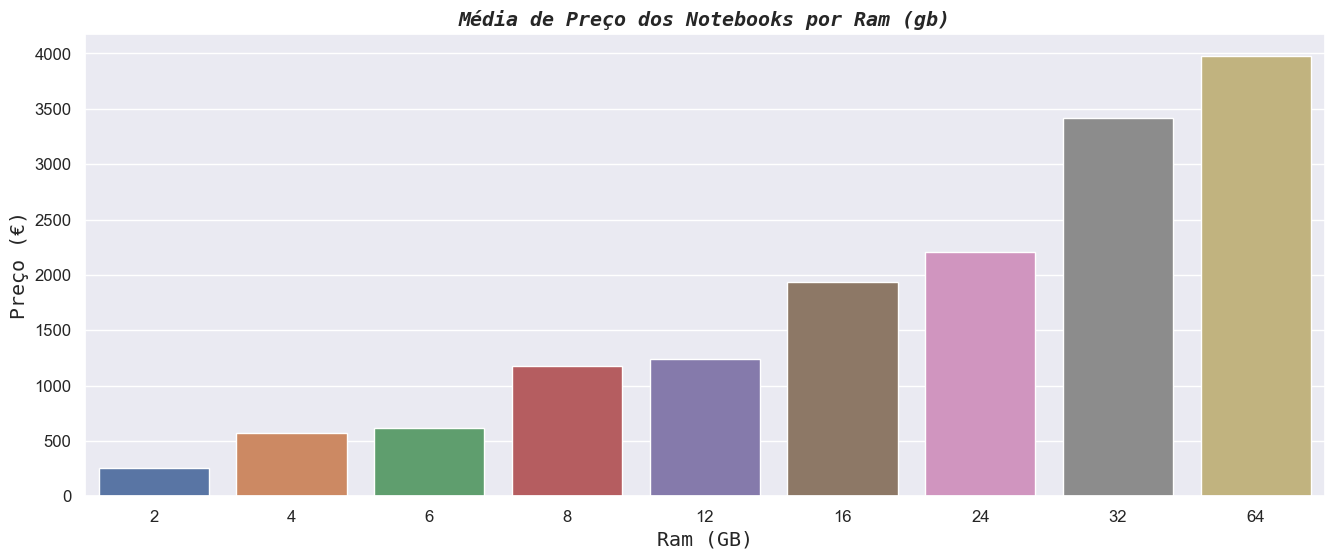

In [8]:
create_bar('ram_gb', 'Ram (GB)', 0)

### Verificar média de preço por sistema operacional

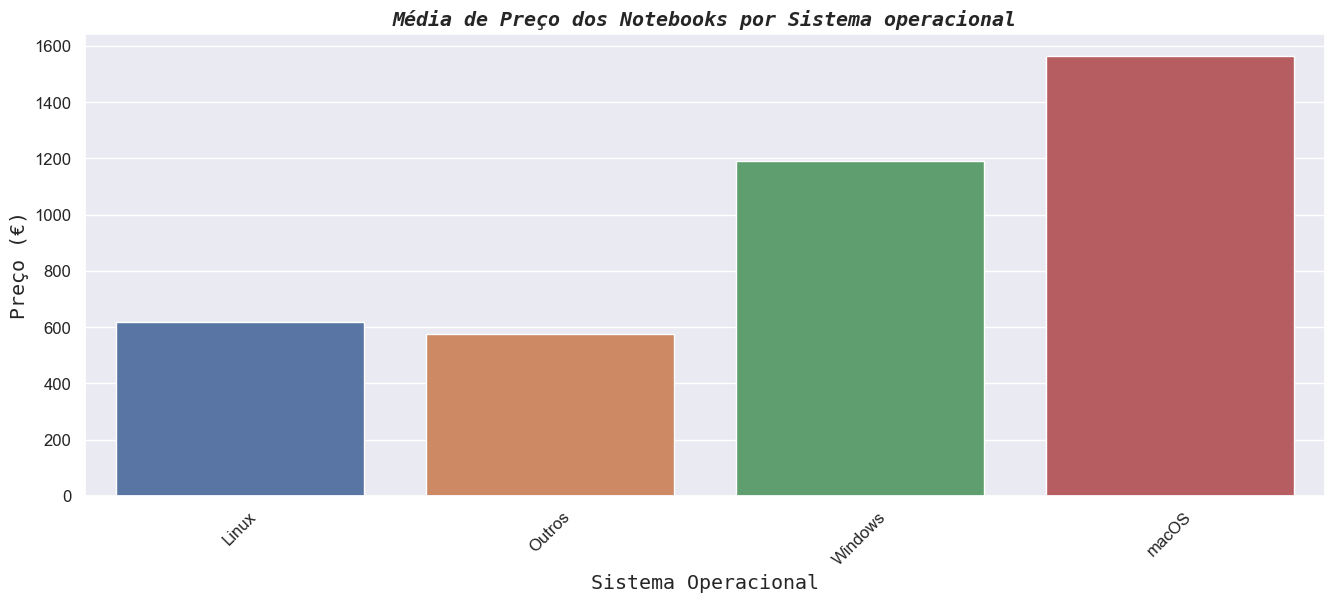

In [9]:
create_bar('opsys', 'Sistema Operacional', 45)

### Verificar média de preço por tipo de armazenamento

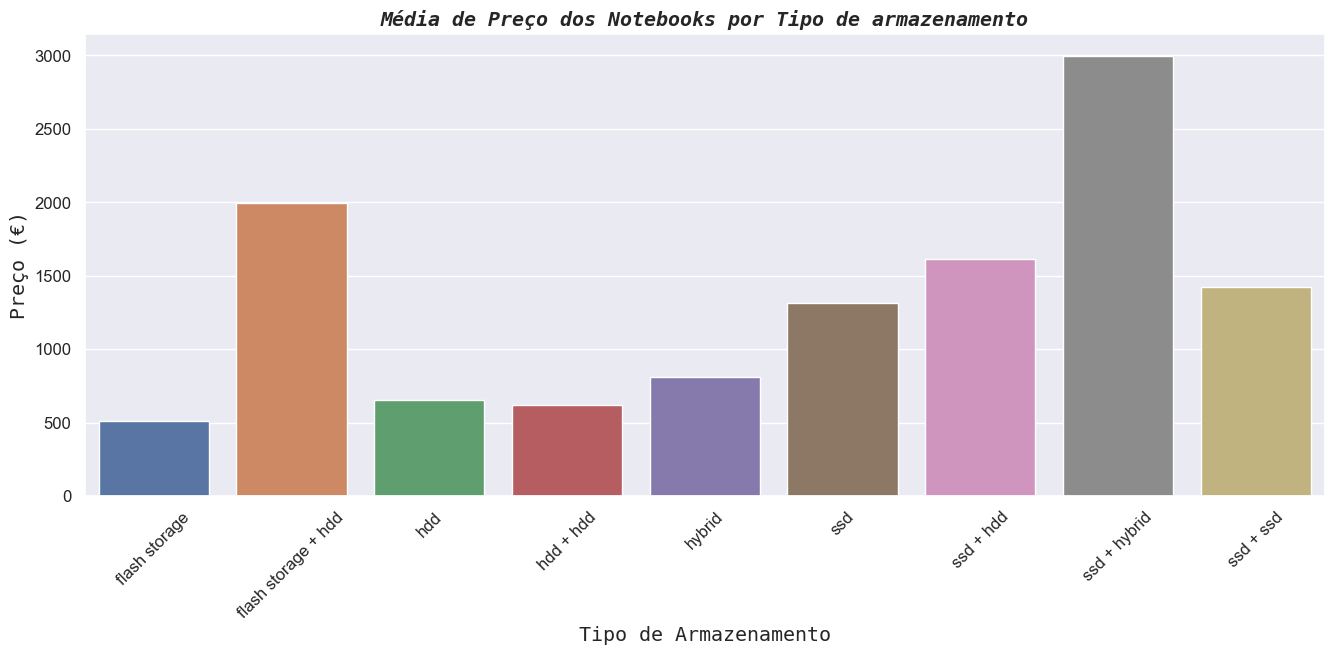

In [10]:
create_bar('type_storage', 'Tipo de Armazenamento', 45)

### Verificar média de preço por polegadas

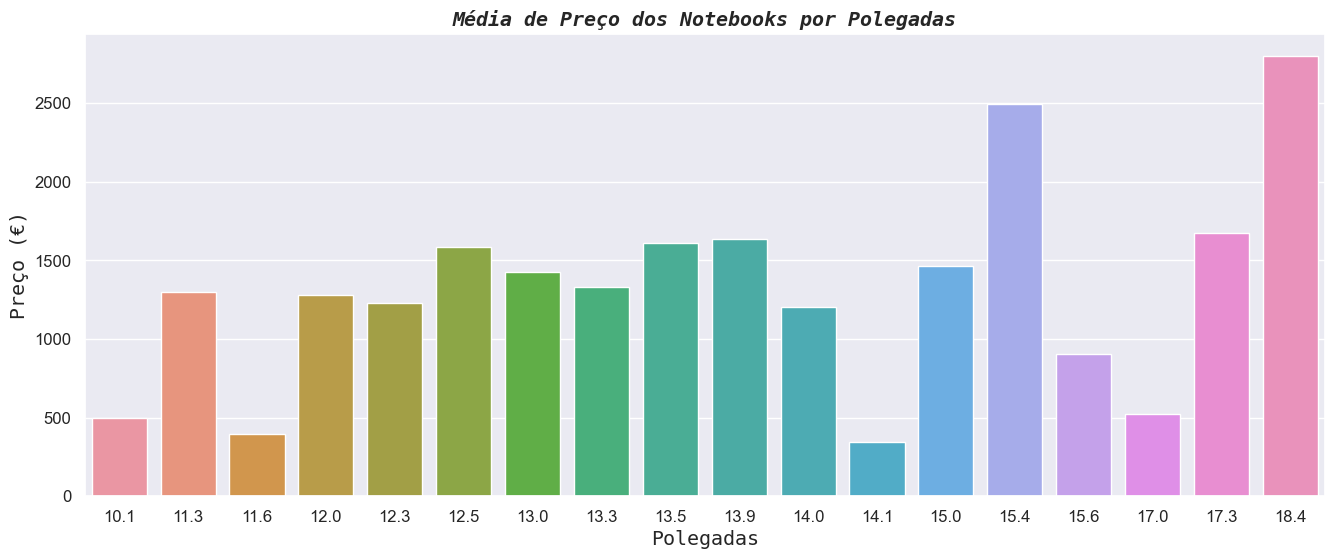

In [11]:
create_bar('inches', 'Polegadas', 0)

### Verificar média de preço por resolução da tela

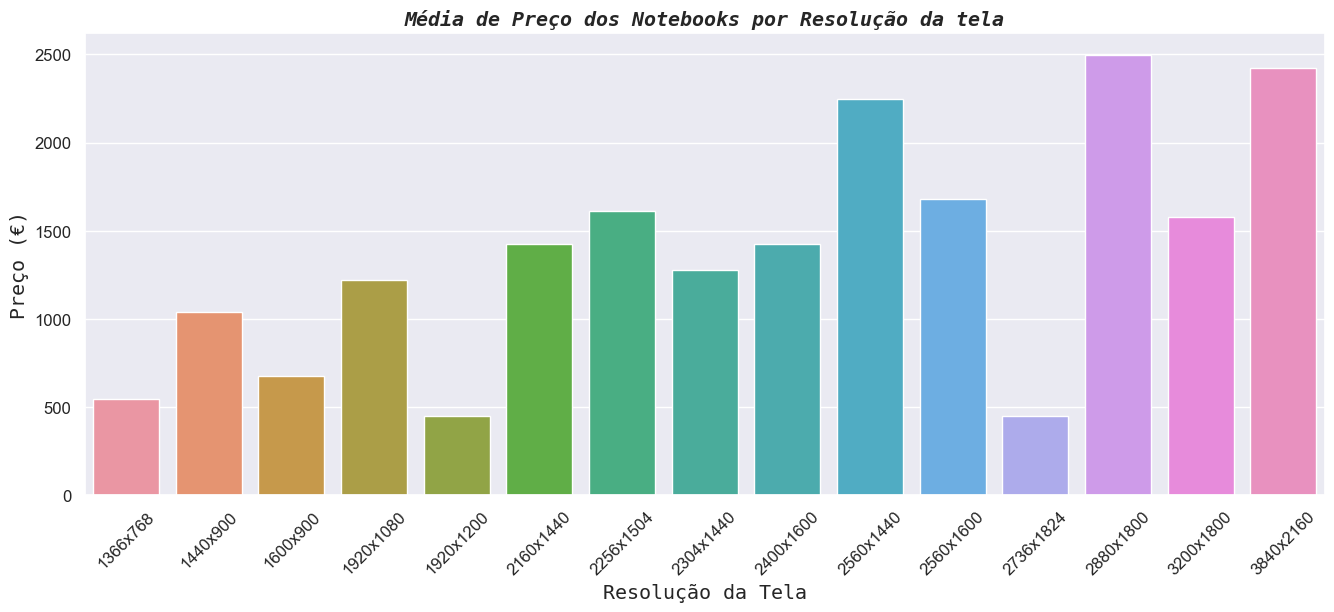

In [12]:
create_bar('screen_resolution', 'Resolução da Tela', 45)

### Verificar média de preço por fabricante da CPU

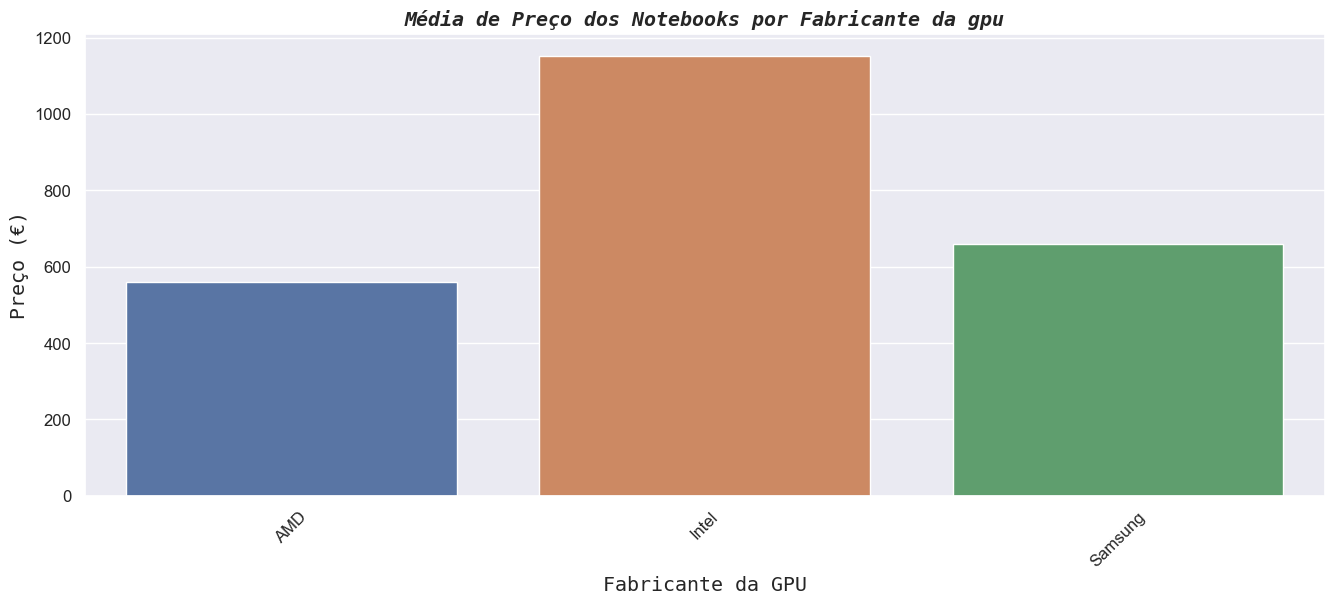

In [13]:
create_bar('cpu_manufacturer', 'Fabricante da GPU', 45)

### Verificar média de preço por fabricante da GPU

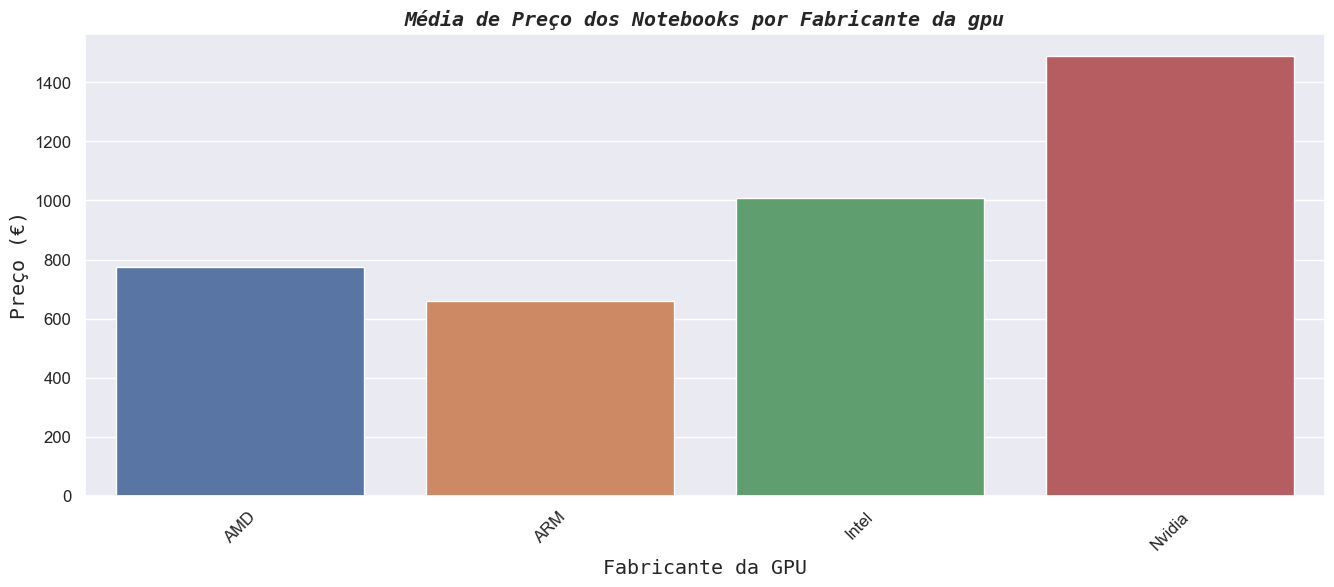

In [14]:
create_bar('gpu_manufacturer', 'Fabricante da GPU', 45)

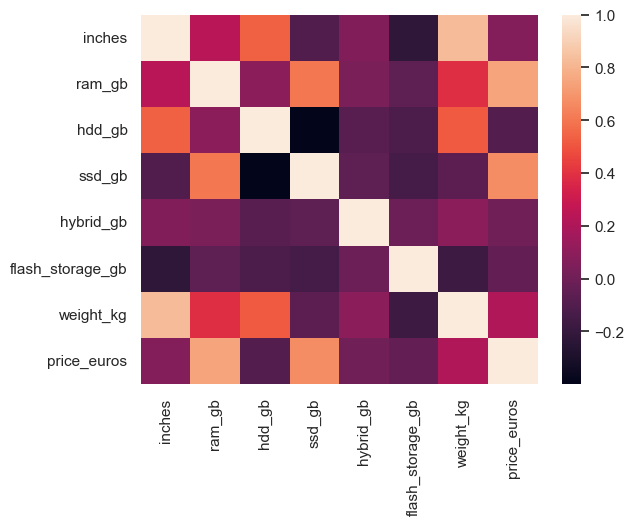

In [15]:
corr = laptop_price.corr()

sns.heatmap(data=corr)
plt.show()